In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/mostafa/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


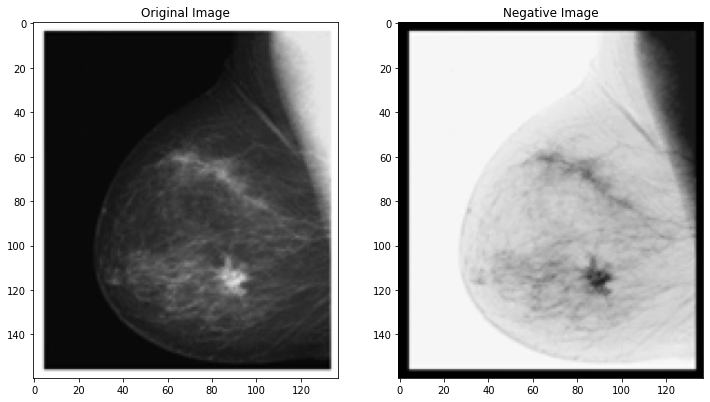

In [4]:
'''
1
Negative Transformation
'''
def negative(image, greyScaleSize=256): 
   return (greyScaleSize - 1) - image

image = rgb2gray(rgba2rgb(io.imread('imgs/Picture1.png'))) # png image with alpha channel
show_images([image, negative(image)],
            ['Original Image', 'Negative Image'])

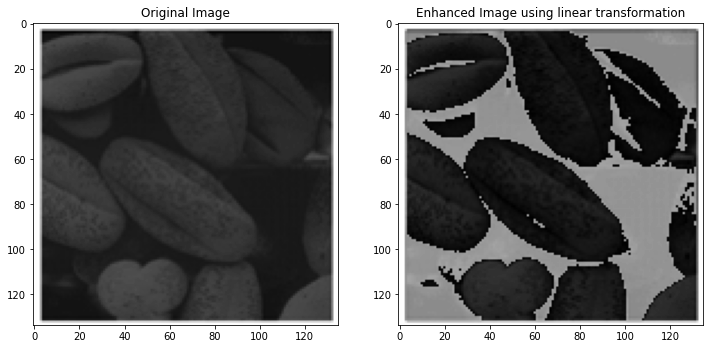

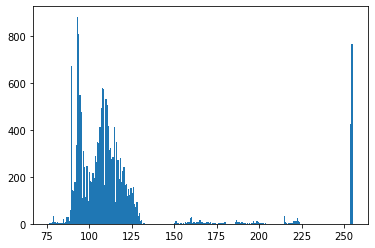

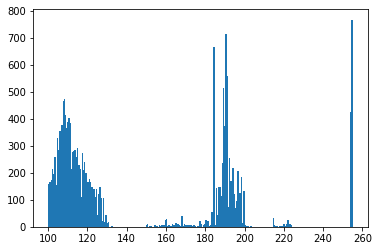

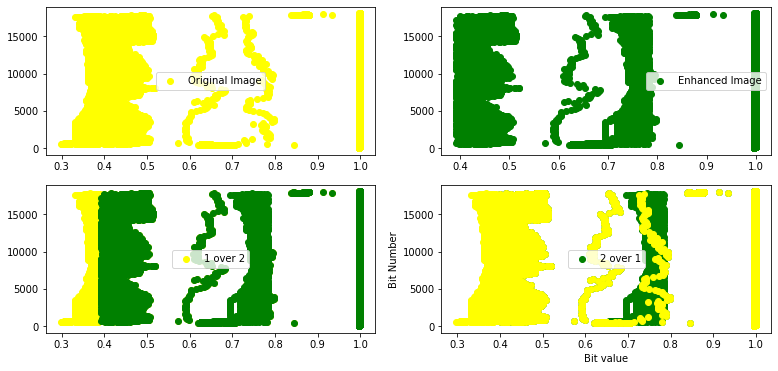

In [5]:
'''
2
Contrast Enhancement
'''
def comparePlotImage(image1, image2):
    plt.ion()
    fig = plt.figure(figsize=(13,6)) # creating a plot
    
    ax = fig.add_subplot(221) # plotting a plot
    ax.scatter(image1.flatten(), range(len(image1.flatten())), color = 'yellow')   
    ax.legend(["Original Image"])

    bx = fig.add_subplot(222)
    bx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')   
    bx.legend(["Enhanced Image"])

    cx = fig.add_subplot(223)
    cx.scatter(image1.flatten(), range(len(image1.flatten())), color = 'yellow')    
    cx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')  
    cx.legend(["1 over 2"])

    dx = fig.add_subplot(224)
    dx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')   
    dx.scatter(image1.flatten(),range(len(image1.flatten())), color = 'yellow')   
    dx.legend(["2 over 1"])

    plt.ylabel('Bit Number')
    plt.xlabel('Bit value')
    plt.show() # show plot

# 0->B, 255->W
# 0:100 -> 50:200
# 50 + (150 * float(val/100))
def contrastEnhance(image):
    def mapping(val):
        return (50/255 + (3 * float(val / 2)))
    enhancedImage = np.array(image).flatten()
    # acts as a generator, yield one element at time, doesn't generate the whole list as the normal list comperhension
    enhancedImage = np.fromiter((( mapping(val) if (val>=0 and val <=100/255) else val) for val in enhancedImage),dtype=enhancedImage.dtype)
    enhancedImage = enhancedImage.reshape(image.shape)
    return enhancedImage


image = rgb2gray(rgba2rgb(io.imread('imgs/Picture2.png'))) # png image with alpha channel
show_images([image, contrastEnhance(image)],
            ['Original Image',  'Enhanced Image using linear transformation'])


showHist(image)
showHist(contrastEnhance(image))
comparePlotImage(image, contrastEnhance(image))

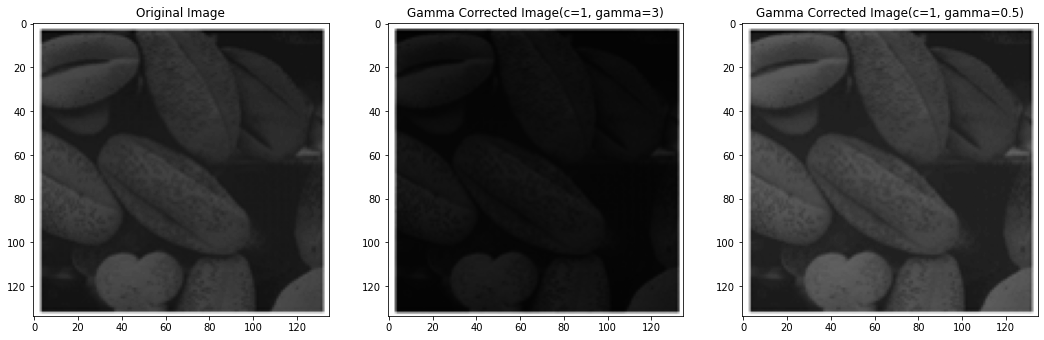

In [6]:
'''
3
Gamma Correction
What is the effect of decreasing 𝛾

# Decreasing gamma makes the image more dark (if the color values are represented from 0 to 1)
# Because by increasing the raised power to a fraction number the number gets smaller (darker pixels)
'''
def gammaCorrection(image,c, y): 
   return (c*(image**y))

image = rgb2gray(rgba2rgb(io.imread('imgs/Picture2.png'))) # png image with alpha channel
show_images([image, gammaCorrection(image, c=1, y=3), gammaCorrection(image, c=1, y=0.5)],
            ['Original Image', 'Gamma Corrected Image(c=1, gamma=3)', 'Gamma Corrected Image(c=1, gamma=0.5)'])

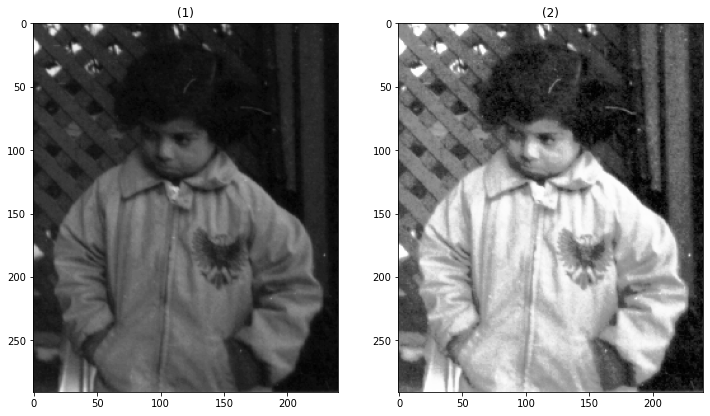

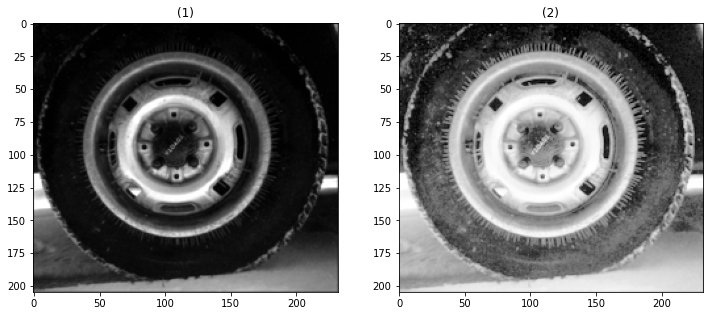

In [24]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def Histogram_Equalization(image,greyScaleSize=256):
    m, n = image.shape
    def G_levelHistogram():
        h = np.zeros(256)
        unique,unique_counts = np.unique(image,return_counts = True)
        h[unique]=unique_counts
        return h

    def CumulativeHistogram(hist):
        hist_c = np.cumsum(hist)
        return hist_c
        
    hist = G_levelHistogram()
    hist_c = CumulativeHistogram(hist)
    
    equalize = np.uint8((greyScaleSize-1) * hist_c/(m*n))
    
    return equalize[image]

    
pout = io.imread('./imgs/pout.tif')
tire = io.imread('./imgs/tire.tif')


new_img= Histogram_Equalization(pout)
show_images(images=[pout,new_img])

new_img= Histogram_Equalization(tire)
show_images(images=[tire,new_img])

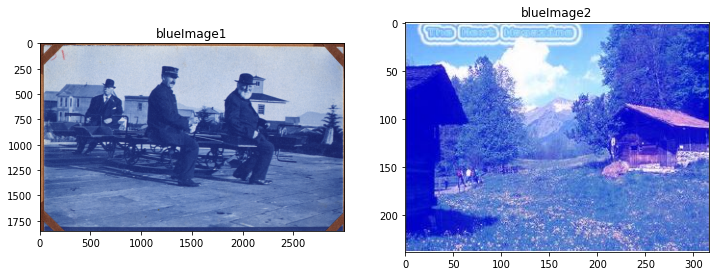

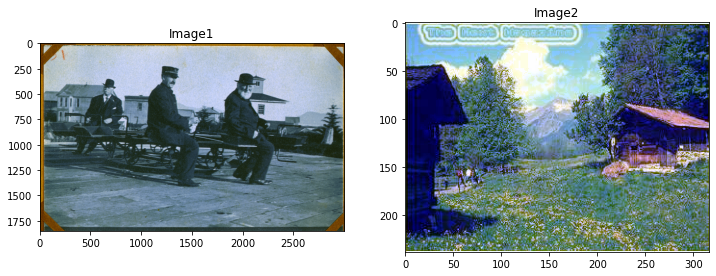

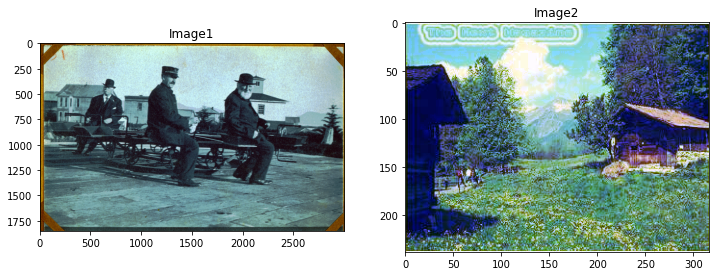

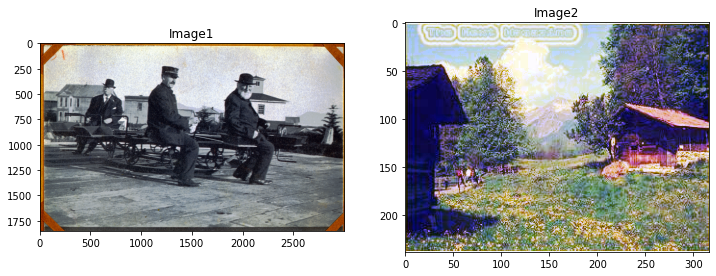

In [13]:
blueImage1 = io.imread('./1.jpg')
blueImage2 = io.imread('./2.jpg')
show_images([blueImage1, blueImage2],
            ['blueImage1', 'blueImage2'])


image1 = blueImage1.copy()
image2 = blueImage2.copy()

image1[:,:,2] = Histogram_Equalization(blueImage1[:,:,2])
image2[:,:,2] = Histogram_Equalization(blueImage2[:,:,2])
show_images([image1, image2],
            ['Image1', 'Image2'])


image1[:,:,1] = Histogram_Equalization(blueImage1[:,:,1])
image2[:,:,1] =  Histogram_Equalization(blueImage2[:,:,1])
show_images([image1, image2],
            ['Image1', 'Image2'])

image1[:,:,0] = Histogram_Equalization(blueImage1[:,:,0])
image2[:,:,0] =  Histogram_Equalization(blueImage2[:,:,0])
show_images([image1, image2],
            ['Image1', 'Image2'])

In [ ]:
blueImage1 = io.imread('./1.jpg')
blueImage2 = io.imread('./2.jpg')

image1 = blueImage1.copy()
image2 = blueImage2.copy()

correctedBlueChannels = Histogram_Equalization(blueImage1[:,:,2])
image1[:,:,2] = correctedBlueChannels

correctedBlueChannels = Histogram_Equalization(blueImage2[:,:,2])
image2[:,:,2] = correctedBlueChannels

show_images([blueImage1, blueImage2],
            ['blueImage1', 'blueImage2'])
show_images([image1, image2],
            ['Image1', 'Image2'])